#### Experiments with Article Headlines ONLY

- In this notebook we will repeat all the preprocessing steps for ONLY the labelled data. Later on we will use the data to build our classification model.
- We will use the headlines ONLY as input to out model in this notebook. 

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sb
from collections import Counter
import tqdm
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import unicodedata
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from wordcloud import WordCloud, STOPWORDS
import gensim
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_recall_fscore_support
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import f1_score, accuracy_score , recall_score , precision_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Users\tooba\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
data = pd.read_csv('Cleaned-Data/preprocessed.csv')
data.head()

,News ID,URL,Headline,Date,Content,Author,Publisher,News Category,Keywords,Label,tokenized_Content,tokenized_Headline
0,0,https://www.dawn.com/news/1458127/mbbs-student...,MBBS student found dead in hostel room at Jams...,2019-01-17,A third-year MBBS student was found shot dead ...,Mohammad Hussain Khan,Dawn,Mental health,"Jamshoro, youth, suicide, mental health",1,"['thirdyear', 'mbbs', 'student', 'found', 'sho...","['mbbs', 'student', 'found', 'dead', 'hostel',..."
1,1,https://www.dawn.com/news/1458129/govt-decides...,"Govt decides to remove names of Bilawal, Murad...",2019-01-17,The federal cabinet has decided to remove the ...,Sanaullah Khan | Javed Hussain,Dawn,Politics,"Islamabad, Sindh, PPP, ECL",1,"['federal', 'cabinet', 'decided', 'remove', 'n...","['govt', 'decides', 'remove', 'names', 'bilawa..."
2,2,https://www.dawn.com/news/1458125/afghan-presi...,Afghan president thanks PM Khan for Pakistan's...,2019-01-17,Afghan President Ashraf Ghani on Thursday tele...,Sanaullah Khan,Dawn,Foreign Affairs,"Afghanistan, foreign affairs, Imran Khan, Ashr...",1,"['afghan', 'president', 'ashraf', 'ghani', 'th...","['afghan', 'president', 'thanks', 'pm', 'khan'..."
3,3,https://www.dawn.com/news/1458123/mehwish-haya...,Mehwish Hayat acts out her musical dreams in n...,2019-01-17,Director and script writer Wajahat Rauf unveil...,dawn,Dawn,Entertainment,"Mehwish Hayat, Enaaya, Azfar Rehman, Wajahat Rauf",-1,"['director', 'script', 'writer', 'wajahat', 'r...","['mehwish', 'hayat', 'acts', 'musical', 'dream..."
4,4,https://www.dawn.com/news/1458118/complete-tex...,Complete text of address by Justice Asif Saeed...,2019-01-17,Complete address by Justice Asif Saeed Khosa o...,dawn,Dawn,Judiciary,"Islamabad, Asif Khosa, Supreme Court, Saqib Nisar",1,"['complete', 'address', 'justice', 'asif', 'sa...","['complete', 'text', 'address', 'justice', 'as..."


- From now onwards we will try to find the best model and features according to our data using exhaustive research.

### Grid Search 
- We perform grid search for all the models and features to find the best combination of model, features and hyperparameters.

#### Logistic Regression with TFIDF

In [3]:
X = data.tokenized_Headline
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1234)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (179,)
X_test (45,)
y_train (179,)
y_test (45,)


In [4]:
# max_df is used for removing terms that appear too frequently
# max_df = 0.50 means "ignore terms that appear in more than 50% of the documents"
# min_df is used for removing terms that appear too infrequently
# min_df = 0.01 means "ignore terms that appear in less than 1% of the documents"
parameters = {'lr__penalty': ('l1','l2'),'tfidf__ngram_range': [(1,1),(1,2),(1,3)],'tfidf__max_df': [0.65,0.75,0.85,0.90],
             'tfidf__min_df': [0.001,0.01],'tfidf__stop_words': [ENGLISH_STOP_WORDS]}

In [5]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),('lr', LogisticRegression())])

In [6]:
# These are the parameters we can put in the list for the model and features.
text_clf.get_params().keys()

dict_keys(['memory', 'steps', 'tfidf', 'lr', 'tfidf__analyzer', 'tfidf__binary', 'tfidf__decode_error', 'tfidf__dtype', 'tfidf__encoding', 'tfidf__input', 'tfidf__lowercase', 'tfidf__max_df', 'tfidf__max_features', 'tfidf__min_df', 'tfidf__ngram_range', 'tfidf__norm', 'tfidf__preprocessor', 'tfidf__smooth_idf', 'tfidf__stop_words', 'tfidf__strip_accents', 'tfidf__sublinear_tf', 'tfidf__token_pattern', 'tfidf__tokenizer', 'tfidf__use_idf', 'tfidf__vocabulary', 'lr__C', 'lr__class_weight', 'lr__dual', 'lr__fit_intercept', 'lr__intercept_scaling', 'lr__max_iter', 'lr__multi_class', 'lr__n_jobs', 'lr__penalty', 'lr__random_state', 'lr__solver', 'lr__tol', 'lr__verbose', 'lr__warm_start'])

In [7]:
gs_lr = GridSearchCV(text_clf, parameters, cv=3, iid=False, n_jobs=-1)
gs_lr = gs_lr.fit(X_train, y_train)
predicted = gs_lr.predict(X_test)

C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [8]:
# Score only on the test set. NO CV
print ("Logistig Regression: \n")
print ( "F1 score {:.4}%".format(f1_score(y_test, predicted, average='macro')*100 ) )
print ( "Accuracy score {:.4}%\n\n".format(accuracy_score(y_test, predicted)*100) )
error = mean_squared_error(y_test, predicted)
print('MSE',error)

Logistig Regression: 



C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



F1 score 28.21%
Accuracy score 73.33%


MSE 0.4666666666666667


In [9]:
print(metrics.classification_report(y_test, predicted,target_names=['Fake','Unverified','Real']))

C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

        Fake       0.00      0.00      0.00         3
  Unverified       0.00      0.00      0.00         9
        Real       0.73      1.00      0.85        33

   micro avg       0.73      0.73      0.73        45
   macro avg       0.24      0.33      0.28        45
weighted avg       0.54      0.73      0.62        45



In [10]:
# print(gs_svm.score(X_test, y_test))
# Mean score  on CV
print('Best score of LR on Cross validated: ',gs_lr.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_lr.best_params_[param_name]))

Best score of LR on Cross validated:  0.7207156308851225
lr__penalty: 'l1'
tfidf__max_df: 0.65
tfidf__min_df: 0.001
tfidf__ngram_range: (1, 1)
tfidf__stop_words: frozenset({'thin', 'mostly', 'through', 'also', 'whole', 'made', 'cannot', 'i', 'became', 'done', 'alone', 'eg', 'himself', 'please', 'sixty', 're', 'serious', 'the', 'else', 'hundred', 'yet', 'four', 'was', 'except', 'whereupon', 'themselves', 'whence', 'too', 'yourselves', 'whatever', 'nothing', 'move', 'to', 'would', 'whoever', 'him', 'down', 'part', 'afterwards', 'each', 'therefore', 'such', 'on', 'sometime', 'out', 'fill', 'until', 'mine', 'another', 'first', 'several', 'them', 'those', 'why', 'more', 'whither', 'being', 'eleven', 'something', 'nowhere', 'beyond', 'though', 'throughout', 'go', 'seems', 'and', 'twenty', 'fifty', 'whereby', 'about', 'yours', 'moreover', 'at', 'nobody', 'between', 'empty', 'anything', 'former', 'might', 'formerly', 'con', 'thick', 'only', 'this', 'both', 'anyway', 'becoming', 'de', 'hers', '

- The best accuracy score we can get using Logistic regression for the cross validated data set is 72%

####  SVM with TFIDF

In [11]:
X = data.tokenized_Headline
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1234)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (179,)
X_test (45,)
y_train (179,)
y_test (45,)


In [12]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),('svm', SGDClassifier())])

In [13]:
parameters = {'svm__penalty': ('l1','l2'),'svm__alpha': (1e-2, 1e-3),
              'svm__loss': ('hinge','squared_hinge'),'tfidf__ngram_range': [(1,1),(1,2),(1,3)],
             'tfidf__max_df': [0.65,0.75,0.85,0.90],'tfidf__min_df': [0.001,0.01],'tfidf__stop_words': [ENGLISH_STOP_WORDS]}

In [14]:
# Using cross validation
# refit = True, that takes the model with the best performance based on cross-validation and retrains it in the whole dataset
gs_svm = GridSearchCV(text_clf, parameters, cv=3, iid=False, n_jobs=-1)
gs_svm = gs_svm.fit(X_train, y_train)
predicted = gs_svm.predict(X_test)

C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning:

max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.



In [15]:
# ONLY ON TEST SET
print ("LINEAR SVM: \n")
print ( "F1 score {:.4}%".format(f1_score(y_test, predicted, average='macro')*100 ) )
print ( "Accuracy score {:.4}%\n\n".format(accuracy_score(y_test, predicted)*100) )
error = mean_squared_error(y_test, predicted)
print('MSE',error)

LINEAR SVM: 



C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



F1 score 38.18%
Accuracy score 73.33%


MSE 0.4666666666666667


In [16]:
print(metrics.classification_report(y_test, predicted,target_names=['Fake','Unverified','Real']))

C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

        Fake       0.00      0.00      0.00         3
  Unverified       0.50      0.22      0.31         9
        Real       0.76      0.94      0.84        33

   micro avg       0.73      0.73      0.73        45
   macro avg       0.42      0.39      0.38        45
weighted avg       0.65      0.73      0.68        45



In [17]:
# Mean cross-validated score of the best_estimator
#best mean score
print('Best Accuracy score for Linear SVM for CV',gs_svm.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_svm.best_params_[param_name]))

Best Accuracy score for Linear SVM for CV 0.7264595103578154
svm__alpha: 0.001
svm__loss: 'squared_hinge'
svm__penalty: 'l2'
tfidf__max_df: 0.85
tfidf__min_df: 0.001
tfidf__ngram_range: (1, 1)
tfidf__stop_words: frozenset({'thin', 'mostly', 'through', 'also', 'whole', 'made', 'cannot', 'i', 'became', 'done', 'alone', 'eg', 'himself', 'please', 'sixty', 're', 'serious', 'the', 'else', 'hundred', 'yet', 'four', 'was', 'except', 'whereupon', 'themselves', 'whence', 'too', 'yourselves', 'whatever', 'nothing', 'move', 'to', 'would', 'whoever', 'him', 'down', 'part', 'afterwards', 'each', 'therefore', 'such', 'on', 'sometime', 'out', 'fill', 'until', 'mine', 'another', 'first', 'several', 'them', 'those', 'why', 'more', 'whither', 'being', 'eleven', 'something', 'nowhere', 'beyond', 'though', 'throughout', 'go', 'seems', 'and', 'twenty', 'fifty', 'whereby', 'about', 'yours', 'moreover', 'at', 'nobody', 'between', 'empty', 'anything', 'former', 'might', 'formerly', 'con', 'thick', 'only', 'th

- The best accuracy score we can get using Linear SVM for the cross validated data set is 72.6%

#### Comparison between Logistic Regression and Linear SVM Grid Search
- The best accuracy score for LR is 72% and 72.6% for Linear SVM on the cross validation data-sets.
- The accuracy score on the test data set(20% data) is 73.3% for both of them

#### Experiment 1 : Best model for Logistic Regression with TFIDF
- Text to Features: TFIDF using the article content (Try different n grams)
- Classification Model: Logistic Regression (Different penalties)


In [18]:
X = data.tokenized_Content
y = data['Label']

In [19]:
tdf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,1),max_df =0.65,min_df=0.001)
vectorizer = tdf.fit(X)
transformed_text = vectorizer.transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(transformed_text,y, test_size = 0.2, random_state=1234)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (179, 12193)
X_test (45, 12193)
y_train (179,)
y_test (45,)


In [21]:
lr = LogisticRegression(penalty='l1')

In [22]:
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [23]:
# 3 cross validation scores
print(cross_val_score(lr, transformed_text, y, cv=3)) 

C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



[0.72       0.72       0.72972973]


In [24]:
# print metrics
print ("Logistig Regression F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(y_test, prediction , average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(y_test, prediction)*100) )

Logistig Regression F1 and Accuracy Scores : 



C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



F1 score 28.21%
Accuracy score 73.33%


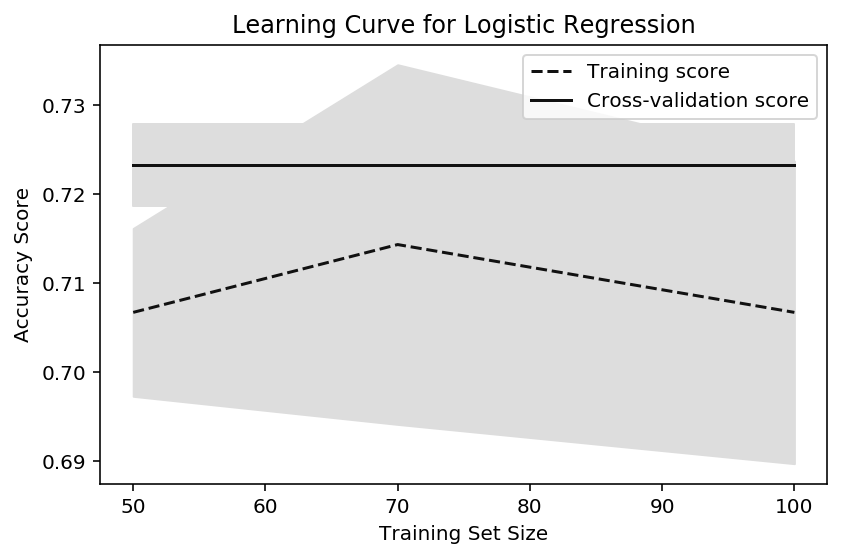

In [25]:
# TAKEN FROM SKLEARN
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(lr, 
                                                        transformed_text, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=3,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=(50,70,100))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


#### Experiment 1 : Best model for SVM with TFIDF
- Text to Features: TFIDF using the article content
- Classification Model: SVM 

- Precision talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive. Should be the metric when there os a high cost associated with False Positive.
- Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.
- For our model both of them are equally important.
- F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. F1 is more useful than accuracy especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. 
- F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [26]:
X = data.tokenized_Headline
y = data['Label']

In [27]:
tdf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,3),max_df =0.65,min_df=0.001)
vectorizer = tdf.fit(X)
transformed_text = vectorizer.transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(transformed_text,y, test_size = 0.2, random_state=1234)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (179, 3639)
X_test (45, 3639)
y_train (179,)
y_test (45,)


In [29]:
svm = SGDClassifier(alpha= 0.01,loss ='squared_hinge',penalty='l2')

In [30]:
svm.fit(X_train, y_train)
prediction = svm.predict(X_test)

C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning:

max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.



In [31]:
# 3 cross validation scores
print(cross_val_score(svm, transformed_text, y, cv=3)) 

C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning:

max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.



[0.72       0.72       0.72972973]


In [32]:
# print metrics
print ("SVM F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(y_test, prediction , average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(y_test, prediction)*100) )
error = mean_squared_error(y_test, prediction)
print('MSE',error)

SVM F1 and Accuracy Scores : 



C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



F1 score 28.21%
Accuracy score 73.33%
MSE 0.4666666666666667


- The value of the accuracy score and F1 score fluctuates alot for this even after Gridsearch. The maximum observed accuracy for the test data is around 73.3% and F1 score is around 28.21%. The best idea would be to go with the cross validated scores.

In [33]:
print(metrics.classification_report(y_test, prediction,target_names=['Fake','Unverified','Real']))

C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\tooba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

        Fake       0.00      0.00      0.00         3
  Unverified       0.00      0.00      0.00         9
        Real       0.73      1.00      0.85        33

   micro avg       0.73      0.73      0.73        45
   macro avg       0.24      0.33      0.28        45
weighted avg       0.54      0.73      0.62        45



 - We plot a learning curve to show the relationship of the training score vs the cross validated test score for an estimator with a varying number of training samples.

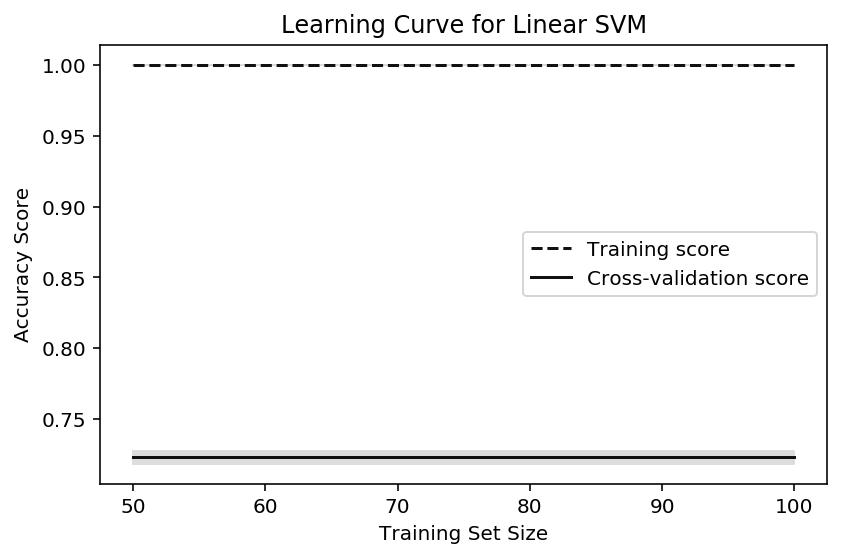

In [34]:
# TAKEN FROM SKLEARN
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(svm, 
                                                        transformed_text, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=3,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=(50,70,100))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve for Linear SVM")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


#### Comparison between final LR and Linear SVM model
- The range for the best accuracy score for both the models on the cross validation data-sets is around 72%. 
- The accuracy score on the test data set(20% data) for both the models is 73.3%.
- Comparing thr scores for thr cross validation and LR, SVM performs much better for our dataset.

#### Observations

- The training score is much greater than the validation score which means that the model probably requires more training examples in order to generalize more effectively.
- The curves are plotted with the mean scores, however variability during cross-validation is shown with the shaded areas that represent a standard deviation above and below the mean for all cross-validations. If the model suffers from error due to bias, then there will likely be more variability around the training score curve. If the model suffers from error due to variance, then there will be more variability around the cross validated score which is the case with our data.
- The variability for the logistic regression model is much greater as compared to the svm model.

In [35]:
unverified = len(data[data['Label']==0])
real = len(data[data['Label']==1])
fake = len(data[data['Label']==-1])
pct_of_unverified = unverified /(unverified+real+fake)
print("percentage of unverified", pct_of_unverified*100)
pct_of_real = real /(unverified+real+fake)
print("percentage of real", pct_of_real*100)
pct_of_fake = fake /(unverified+real+fake)
print("percentage of fake", pct_of_fake*100)

percentage of unverified 22.767857142857142
percentage of real 72.32142857142857
percentage of fake 4.910714285714286


- (Observation from learning curve when CV=10. Now we reduced it to CV =3)As we increase the value of cv while performing gridsearch with our models and features, the accuracy score across the hold out dataset decreases. The possible reason for this could be the class imbalance. From the above calculation we can see that the amout of data with fake news is extremely small so it is possible that these examples doesn't come in the training set during cv and the model sees this unexpected class in the test set resulting in a false positive.
- The best results for our data comes with CV = 3 